In [1]:
%pylab
%matplotlib notebook

Using matplotlib backend: <object object at 0x7fce68dd32e0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.table as at
from statsmodels.api import qqplot
import scipy
import scipy.stats as st

In [3]:
data = at.Table.read('statsdemo.csv', format='csv')

In [4]:
data

time,mag.outlier,mag.het,mag.het.error
float64,float64,float64,float64
0.0,18.5306774114789,18.5674472421206,0.0673447662033141
0.17615778844447,18.5515604297523,18.5473152136787,0.0171485664555803
0.250164970666731,18.4680954415675,18.5641906767379,0.0206004055216908
1.42698258962969,18.5373682418528,18.5541623997199,0.0743387433001772
1.67714756266668,18.7905210141074,18.5147653876404,0.0274689674843103
1.92731250014822,18.5484733020366,18.5511344995731,0.00128030302003026
2.00131967288894,18.5738948687948,18.5463770669773,0.0385863671079278
...,...,...,...
10.5069245985185,18.5319886869186,18.5628621968699,0.0116179539356381


<IPython.core.display.Javascript object>


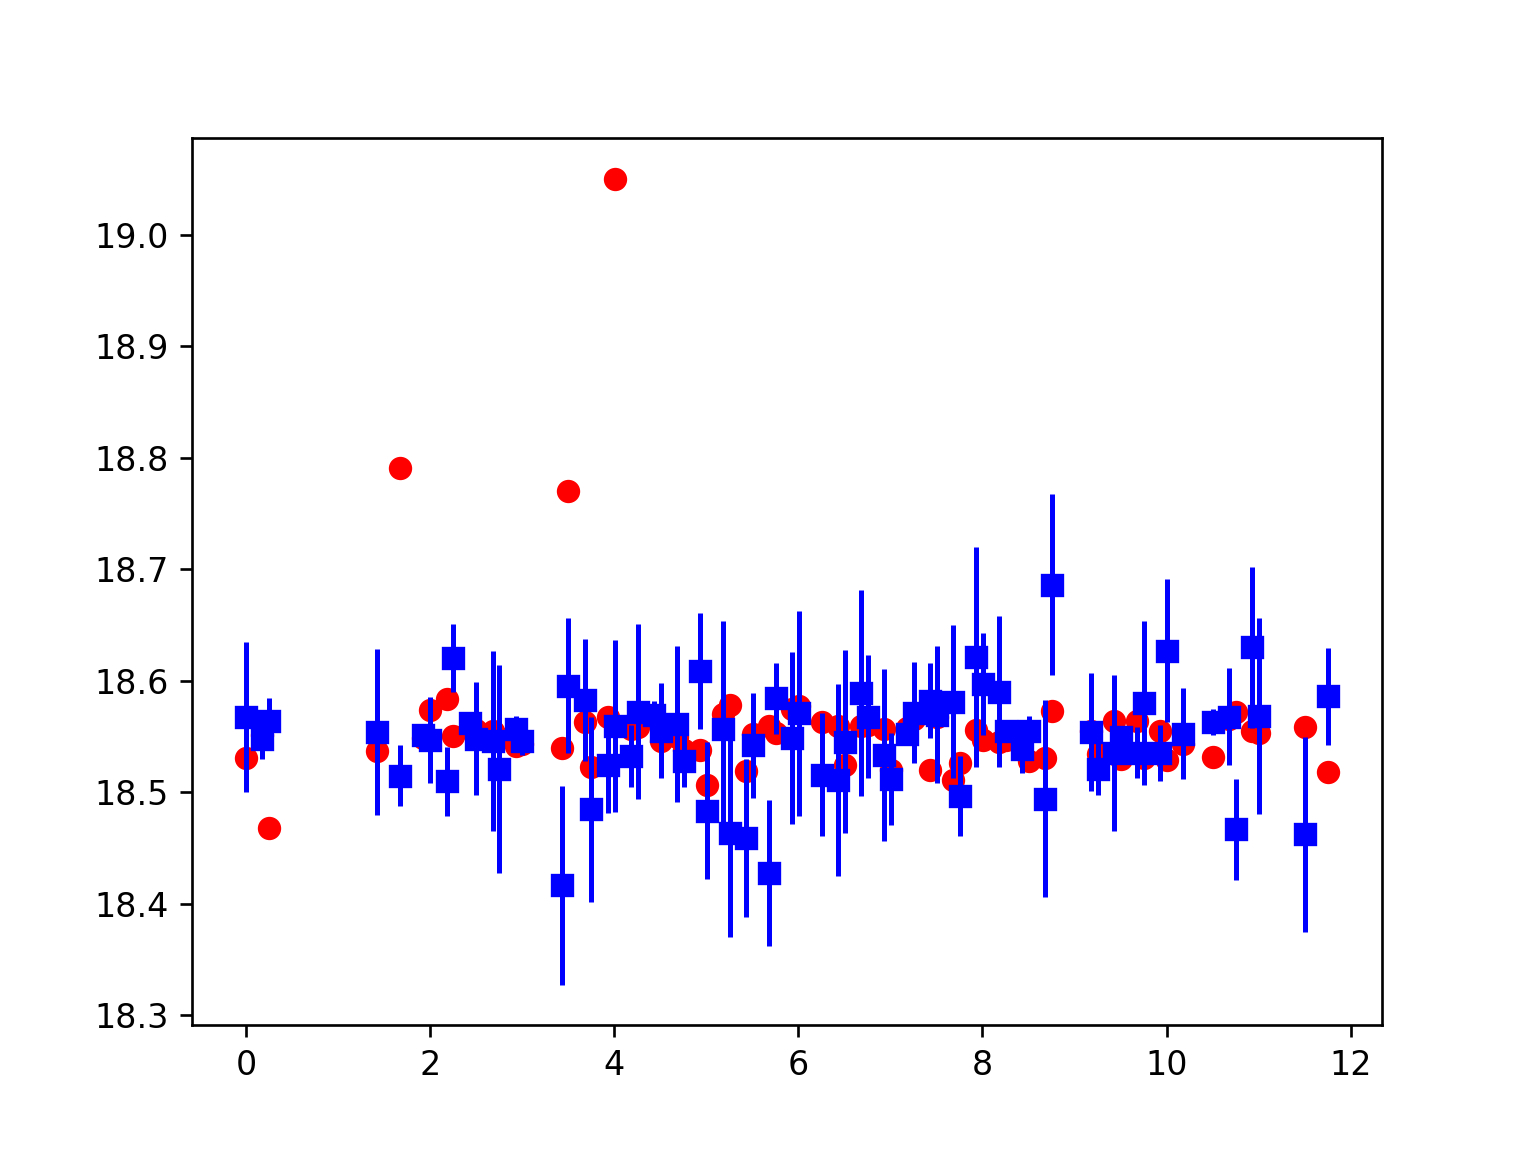

In [5]:
# always good to look at the data
plot(data['time'], data['mag.outlier'], 'ro')
errorbar(data['time'], data['mag.het'], data['mag.het.error'], color='b', linestyle='None', marker='s');

<IPython.core.display.Javascript object>


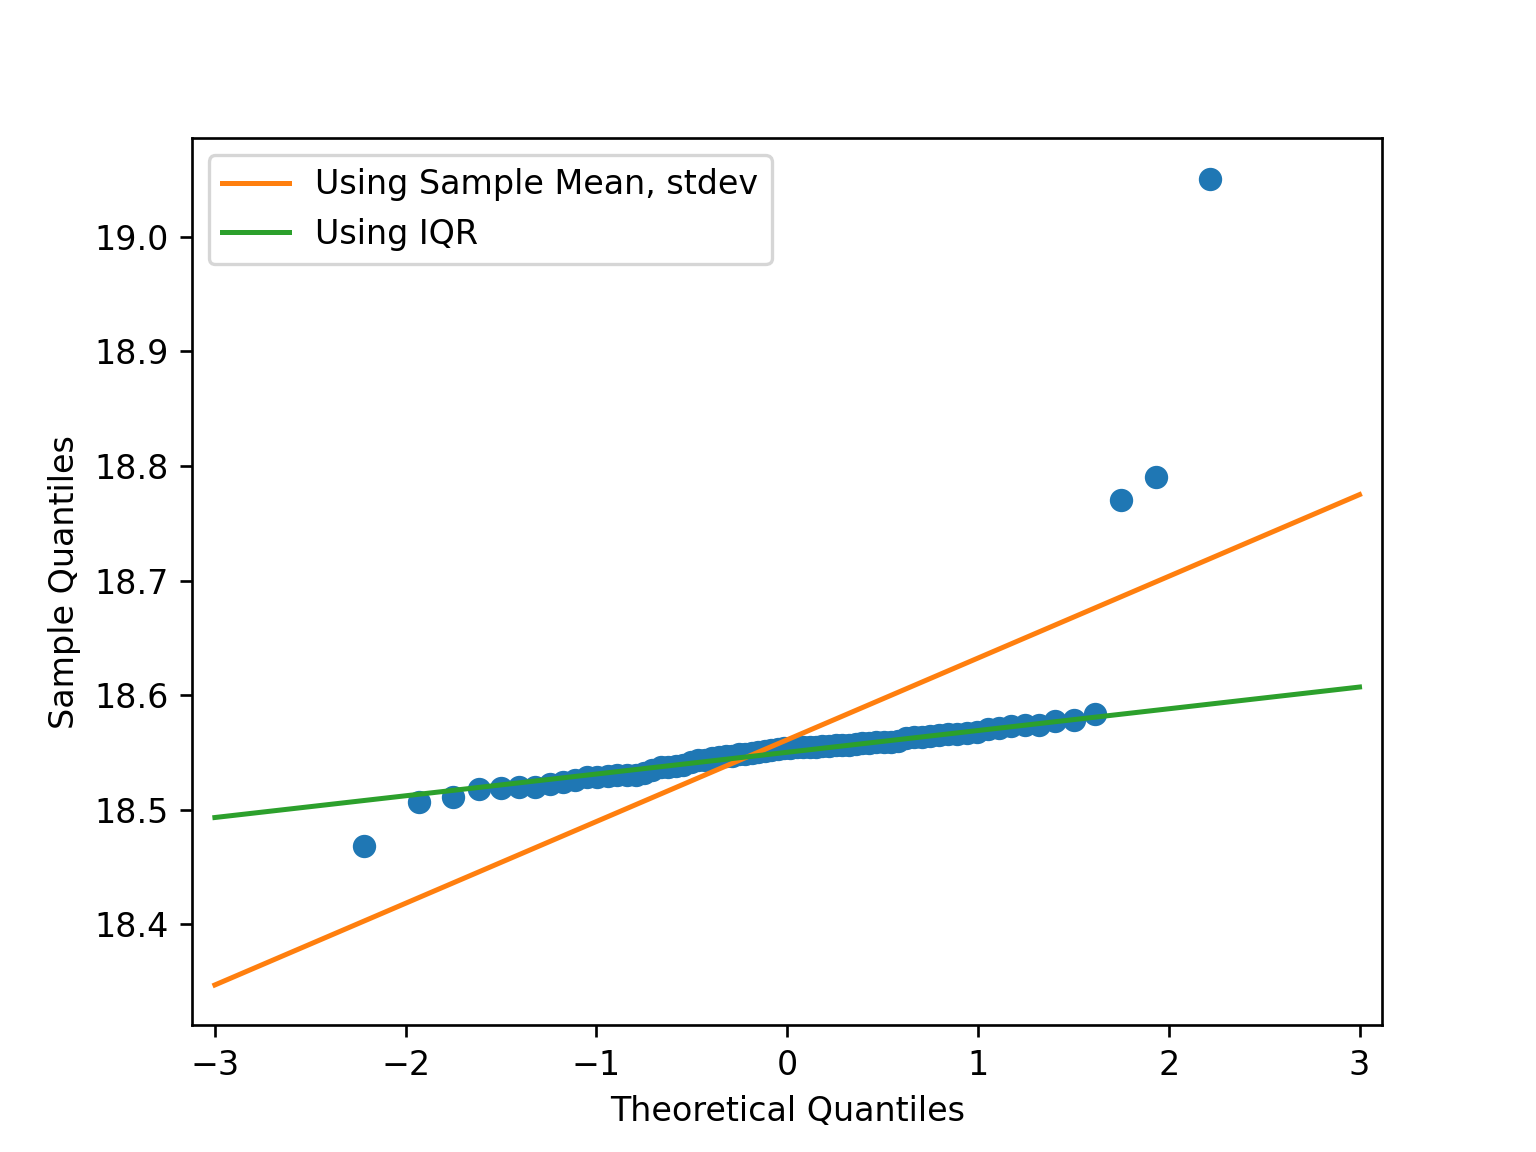

In [6]:
qqplot(data['mag.outlier']);
mean = data['mag.outlier'].mean()
sigma = data['mag.outlier'].std()
xmin, xmax = -3., 3.
xvals = np.arange(xmin, xmax+0.1, 0.1)
yvals = mean + sigma*xvals
plot(xvals, yvals, 'C1-', label='Using Sample Mean, stdev')

q25, q75 = np.percentile(data['mag.outlier'], 25), np.percentile(data['mag.outlier'], 75)
iqr = q75-q25
x25, x75 = st.norm.ppf(0.25), st.norm.ppf(0.75)

yvals2 = q25 + (iqr/(x75-x25) )* (xvals - x25)
plot(xvals, yvals2, 'C2-', label='Using IQR')
legend();

<IPython.core.display.Javascript object>


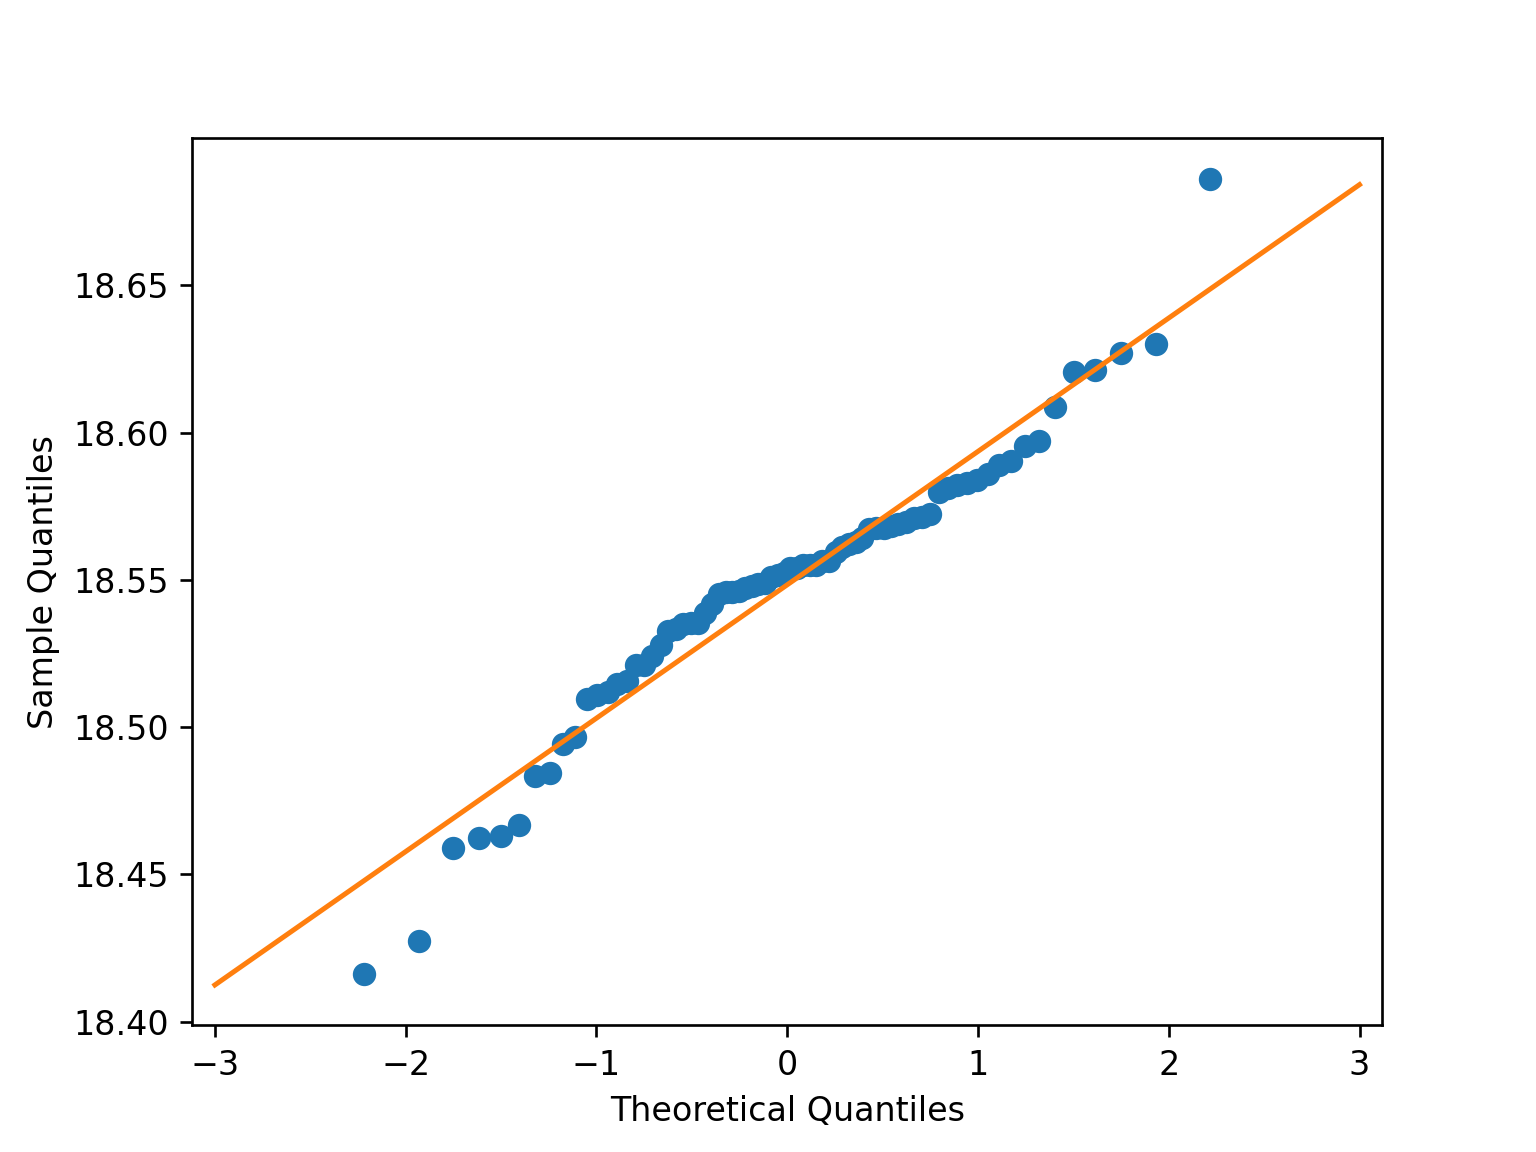

In [7]:
qqplot(data['mag.het']);
mean = data['mag.het'].mean()
sigma = data['mag.het'].std()
xmin, xmax = -3., 3.
xvals = np.arange(xmin, xmax+0.1, 0.1)
yvals = mean + sigma*xvals
plot(xvals, yvals, 'C1-', label='Using Sample Mean, stdev')

<IPython.core.display.Javascript object>


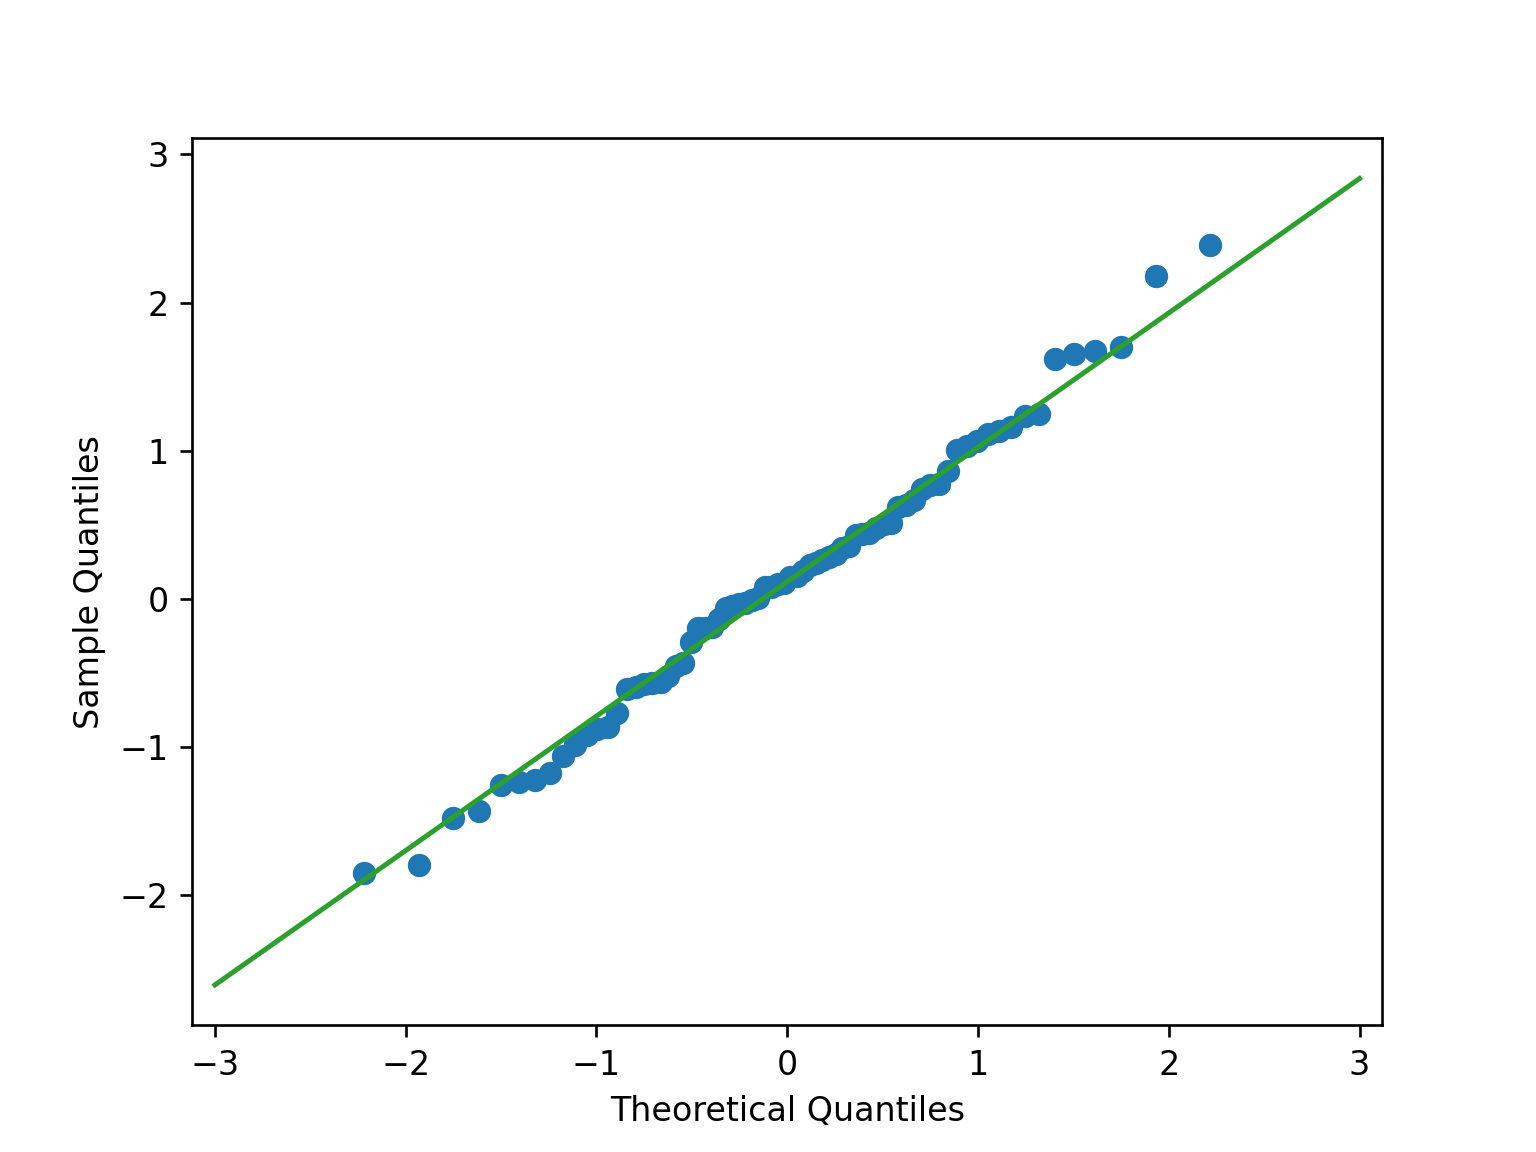

In [9]:
z = (data['mag.het'] -  np.mean(data['mag.het']))/data['mag.het.error']
qqplot(z);
mean = z.mean()
sigma = z.std()
xmin, xmax = -3., 3.
xvals = np.arange(xmin, xmax+0.1, 0.1)
yvals = mean + sigma*xvals
plot(xvals, yvals, 'C2-', label='Using Sample Mean, stdev')